In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("train (version 1).csv")
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Previous Sale,Current Sale,YOY,MOM
0,1.0,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,$261.96,1360.0,4957.0,-73%,264%
1,2.0,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",$731.94,4272.0,2644.0,62%,-38%
2,3.0,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,$14.62,3592.0,2563.0,40%,-29%
3,4.0,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,$957.58,966.0,3103.0,-69%,221%
4,5.0,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,$22.37,4926.0,2477.0,99%,-50%


In [ ]:
print(df.dtypes)

Row ID           float64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales             object
Previous Sale    float64
Current Sale     float64
YOY               object
MOM               object
dtype: object


In [ ]:
print(df.describe())

            Row ID   Postal Code  Previous Sale  Current Sale
count  9800.000000   9789.000000    9800.000000   9800.000000
mean   4900.500000  55273.322403    2760.501224   2720.735306
std    2829.160653  32041.223413    1293.617971   1288.653875
min       1.000000   1040.000000     501.000000    500.000000
25%    2450.750000  23223.000000    1625.000000   1616.750000
50%    4900.500000  58103.000000    2778.000000   2694.000000
75%    7350.250000  90008.000000    3876.000000   3833.000000
max    9800.000000  99301.000000    4999.000000   4999.000000


In [ ]:
print(df.isnull().sum())

Row ID            1
Order ID          1
Order Date        1
Ship Date         1
Ship Mode         1
Customer ID       1
Customer Name     1
Segment           1
Country           1
City              1
State             1
Postal Code      12
Region            1
Product ID        1
Category          1
Sub-Category      1
Product Name      1
Sales             1
Previous Sale     1
Current Sale      1
YOY               1
MOM               1
dtype: int64


In [ ]:
print(df.nunique())

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5396
Previous Sale    3969
Current Sale     4030
YOY               680
MOM               662
dtype: int64


In [ ]:
sns.set(style="whitegrid")

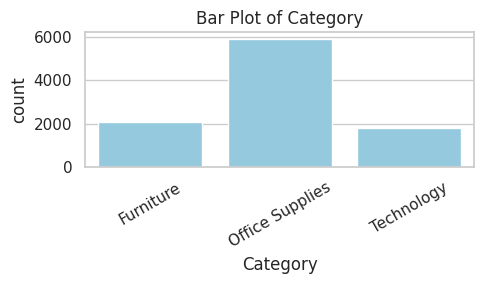

In [ ]:
categorical_columns = ['Category']  # You can choose 'Region', 'Segment', etc.

for col in categorical_columns:
    if col in df.columns:
        plt.figure(figsize=(5, 3))
        sns.countplot(x=col, data=df, color="skyblue")  # Use 'color' instead of 'palette'
        plt.title(f'Bar Plot of {col}')
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{col}' not found in DataFrame.")
        sns.countplot(x=col, hue=col, data=df, palette="Set2", legend=False)


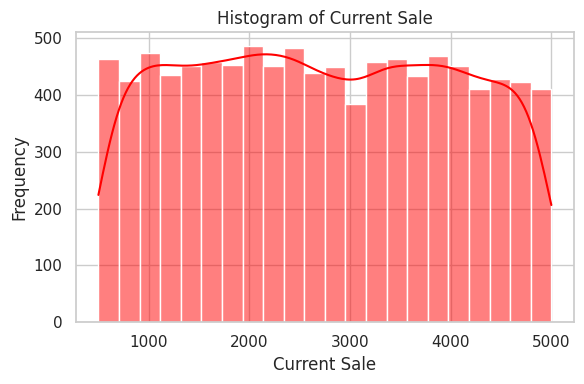

In [ ]:
numerical_columns = ['Current Sale']

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True, color="red")
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-24-1815292072.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Previous Sale', y='Current Sale', data=df, palette="Set2")


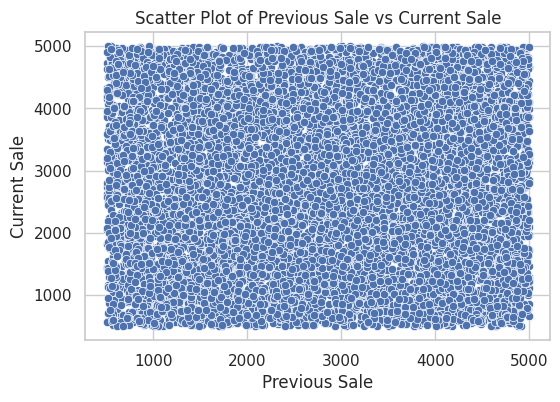

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Previous Sale', y='Current Sale', data=df, palette="Set2")
plt.title('Scatter Plot of Previous Sale vs Current Sale')
plt.show()


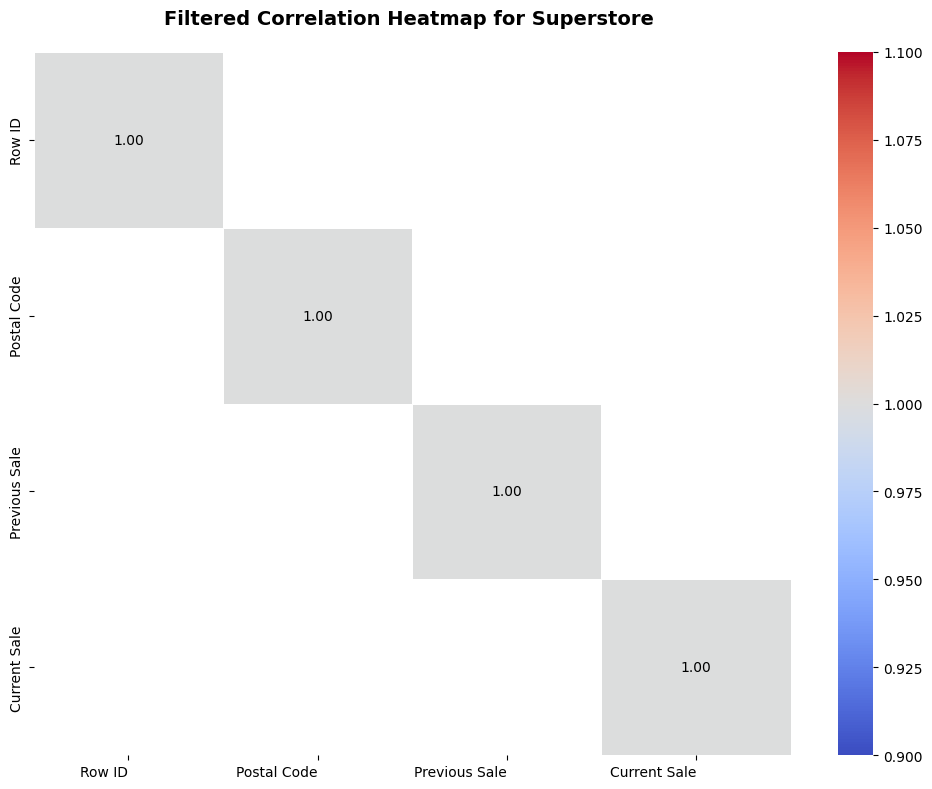

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('train (version 1).csv')  # Make sure this file is in your working directory

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation
corr = df[numerical_columns].corr()

# Mask correlations with abs value < 1 (only show perfect correlations)
mask = (corr.abs() < 1)
strong_corr = corr.mask(mask)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    strong_corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    mask=mask,
    annot_kws={'size': 10, 'color': 'black'},
    linewidths=0.5
)

plt.title('Filtered Correlation Heatmap for Superstore ', fontsize=14, weight='bold', pad=20)
plt.xticks(rotation=360, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
